# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [26]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [2]:
athletes = pd.read_csv("athletes.csv")

In [27]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

In [28]:
athletes#.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0ECDBBF0>,
      dtype=object)

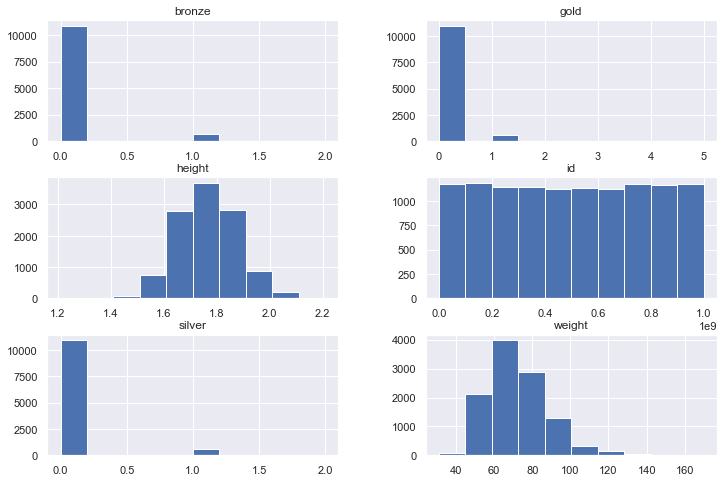

In [29]:
athletes.hist()

In [30]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 766.2+ KB


In [31]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


## Inicia sua análise a partir daqui

In [19]:
# Sua análise começa aqui.


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [15]:
def q1():
    # Retorne aqui o resultado da questão 1.
    significance = 0.05
    height_serie = get_sample(athletes, 'height', 3000)
    return bool(sct.shapiro(height_serie)[1] > significance)
    pass

In [17]:
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?


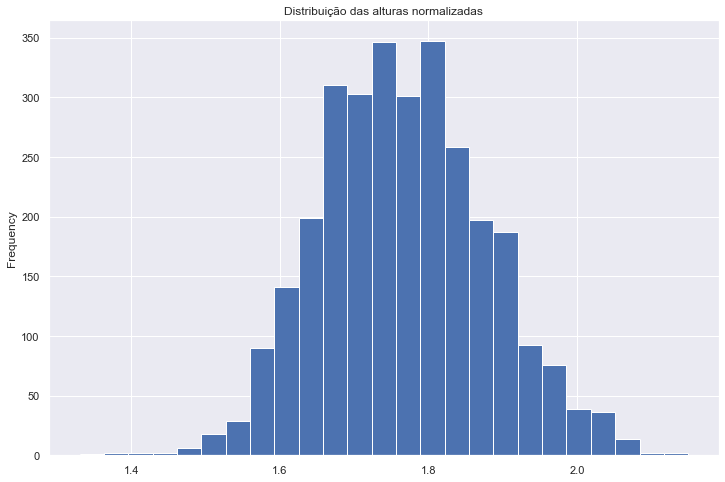

In [22]:
height_serie = get_sample(athletes, 'height', 3000)
height_serie.plot(kind='hist', y='Frequência', x='Distribuição', bins=25)
plt.title('Distribuição das alturas normalizadas')
plt.show()

* Plote o qq-plot para essa variável e a analise.


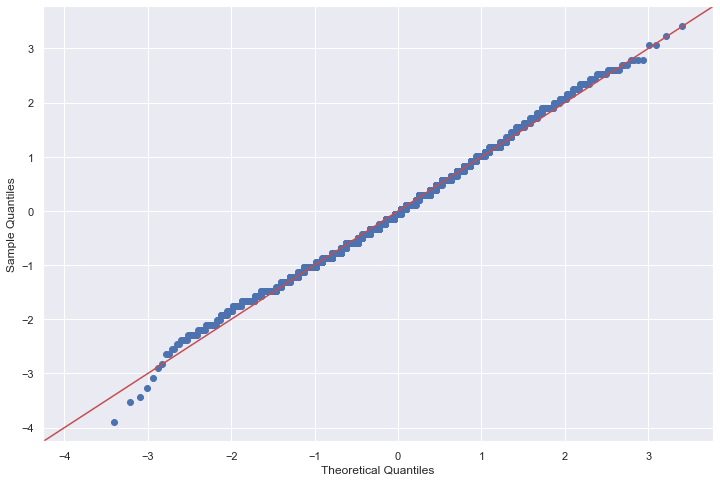

In [38]:
sm.qqplot(height_serie, fit=True ,line='45')
plt.show()

* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [39]:
def q2():
    # Retorne aqui o resultado da questão 2.
    significance = 0.05
    height_serie = get_sample(athletes, 'height', 3000)
    return bool(sct.jarque_bera(height_serie)[1] > significance)
    pass

In [40]:
q2

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [41]:
def q3():
    # Retorne aqui o resultado da questão 3.
    significance = 0.05
    height_serie = get_sample(athletes, 'weight', 3000)
    return bool(sct.normaltest(height_serie)[1] > significance)
    pass

In [43]:
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?


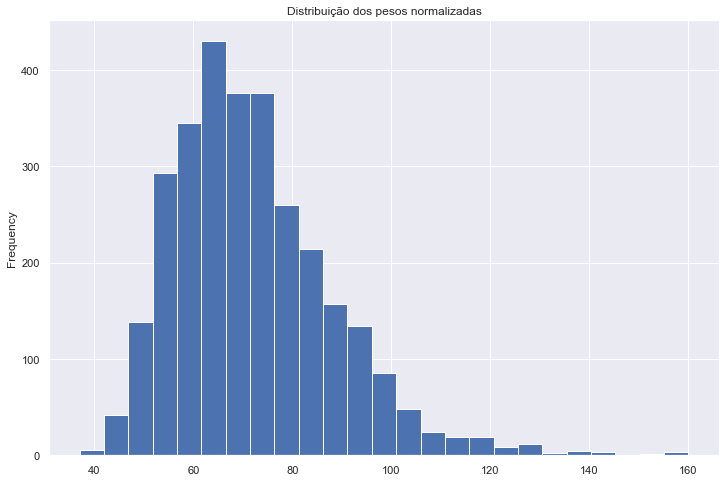

In [53]:
height_serie = get_sample(athletes, 'weight', 3000)
height_serie.plot(kind='hist', y='Frequência', x='Distribuição', bins=25)
plt.title('Distribuição dos pesos normalizadas')
plt.show()

* Um _box plot_ também poderia ajudar a entender a resposta.

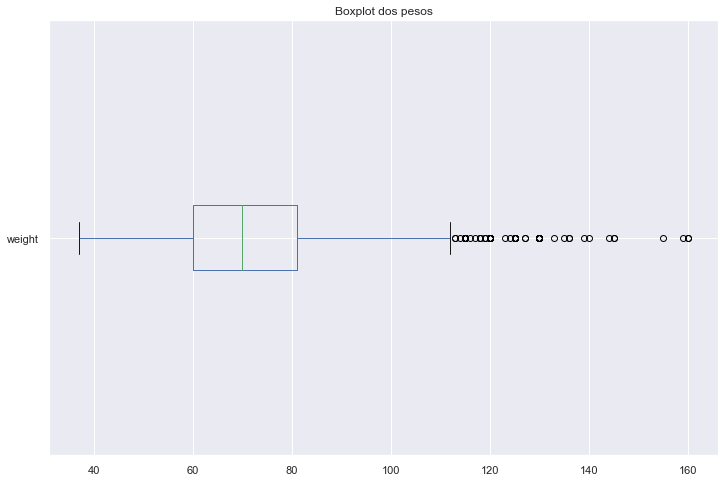

In [45]:
height_serie = get_sample(athletes, 'weight', 3000)
height_serie.plot(kind='box', vert=False)
plt.title('Boxplot dos pesos')
plt.show()

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [49]:
def q4():
    # Retorne aqui o resultado da questão 4.
    significance = 0.05
    height_serie = np.log(get_sample(athletes, 'height', 3000))
    return bool(sct.shapiro(height_serie)[1] > significance)
    pass

In [50]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?


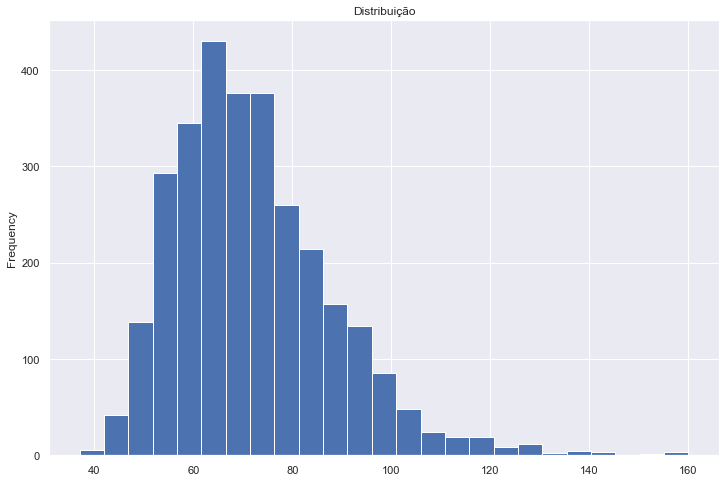

In [54]:
height_serie = get_sample(athletes, 'weight', 3000)
height_serie.plot(kind='hist', y='Frequência', x='Distribuição', bins=25)
plt.title('Distribuição')
plt.show()

* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [55]:
def q5():
    # Retorne aqui o resultado da questão 5.
    bra = athletes[athletes['nationality'] == 'BRA'].height.dropna()
    usa = athletes[athletes['nationality'] == 'USA'].height.dropna()
    significance = 0.05
    statistic, pvalue = sct.stats.ttest_ind(bra, usa)
    return bool(pvalue > significance)
    pass

In [56]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [59]:
def q6():
    # Retorne aqui o resultado da questão 6.
    bra = athletes[athletes['nationality'] == 'BRA'].height.dropna()
    can = athletes[athletes['nationality'] == 'CAN'].height.dropna()
    significance = 0.05
    statistic, pvalue = sct.stats.ttest_ind(bra, can)
    return bool(pvalue > significance)
    pass

In [60]:
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [61]:
def q7():
    # Retorne aqui o resultado da questão 7.
    usa = athletes[athletes['nationality'] == 'USA'].height.dropna()
    can = athletes[athletes['nationality'] == 'CAN'].height.dropna()
    statistic, pvalue = sct.stats.ttest_ind(usa, can, equal_var=False)
    return float(pvalue.round(8))
    pass

In [62]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?